### **PROYECTO 2**


### 1. Pre procesamiento de Datos

En esta sección, debes realizar un preprocesamiento de datos para obtener mejores resultados en los modelos:

* deteccion y eliminacion de outliers
* imputacion de valores faltantes
* encoding
* escalado de datos
* reduccion de dimensionalidad




## Importar librerias y cargar dataset

0. Importa las librerías necesarias para trabajar en la consigna.

In [1]:
#paso 1 : importar librerias y cargar el dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df_properati=pd.read_csv("C:/Users/ACER/Anaconda3/envs/ACAMICA/Library/resources/DS_Proyecto_01_Datos_Properati.csv", sep=",")


1. Carga el dataset usando las funcionalidades de Pandas. Imprimir cuántas filas y columnas tiene, y sus cinco primeras instancias.

In [2]:
#df_properati.head()
print(df_properati.describe())
#df_properati.shape
#df_properati.dtypes
print("Numpero de filas: " , len(df_properati.index))
print("Numpero de columnas: " , len(df_properati.columns))
df_properati.head(5)


                 lat            lon          rooms       bedrooms  \
count  136735.000000  136701.000000  146660.000000  146660.000000   
mean      -34.604896     -58.465304       3.079817       1.983240   
std         0.468428       0.486190       1.416352       1.151304   
min       -35.318457    -180.000000       1.000000       0.000000   
25%       -34.627667     -58.504012       2.000000       1.000000   
50%       -34.600943     -58.443262       3.000000       2.000000   
75%       -34.574600     -58.407586       4.000000       3.000000   
max        85.051129     -57.805832      35.000000      15.000000   

           bathrooms  surface_total  surface_covered         price  
count  140703.000000  126133.000000    125046.000000  1.466600e+05  
mean        1.599994     216.872888       112.818011  2.412211e+05  
std         0.889324    2037.606649       916.857584  3.185195e+05  
min         1.000000      10.000000         1.000000  5.500000e+03  
25%         1.000000      52.0000

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
4,2019-10-17,2020-03-11,2019-10-17,-34.914194,-57.938219,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,USD,58 entre 1 y 2 Venta de departamento en ph.1 ...,58 entre 1 y 2 Venta de departamento en PH. P...,PH,Venta


### filtrado de data set y eliminacion de columnas no relevantes
a diferencia del proyecto 1 se incorpora en el analisis la ubicacion de las propiedades ya que se infiere por experiencia que la ubicacion de las propiedades tiene una correlacion con el precio de las propiedades. tambien se decidio trabajar solo con las propiedades de capital federal ya que como se vio en el proyecto 1 la mayor cantidad de datos provienen de capital federal.
se decide eliminar superficie cubierta que aporta la misma relacion que superficie total debido a su alta correlacion entre estas 2 variables

In [3]:
df_properati2= df_properati[(df_properati["l2"]=="Capital Federal") & (df_properati["property_type"]=="Departamento")]
df_properati3= df_properati[(df_properati["l2"]=="Capital Federal") & (df_properati["property_type"]=="Casa")]
df_properati4= df_properati[(df_properati["l2"]=="Capital Federal") & (df_properati["property_type"]=="PH")]
df=pd.concat([df_properati2,df_properati3,df_properati4])
df=df[["rooms","bedrooms","bathrooms","surface_total","surface_covered","price","property_type","l3"]]
df=df.drop(["surface_covered"], axis=1)

In [4]:

df.shape


(91485, 7)

In [5]:
df.describe()

,rooms,bedrooms,bathrooms,surface_total,price
count,91485.000000,91485.000000,89314.000000,82568.000000,9.148500e+04
mean,2.964278,1.960278,1.560147,112.626369,2.595003e+05
std,1.314704,1.072946,0.860309,980.713664,3.222654e+05
min,1.000000,0.000000,1.000000,10.000000,6.000000e+03
25%,2.000000,1.000000,1.000000,49.000000,1.200000e+05
50%,3.000000,2.000000,1.000000,71.000000,1.750000e+05
75%,4.000000,3.000000,2.000000,111.000000,2.790000e+05
max,26.000000,15.000000,14.000000,126062.000000,3.243423e+07


##### Se eliminan los outliers con la mayor varianza ya que signfica que hay una diferencia grande entre la media y el maximo. no se eliminan outliers de precio ya que es la variable objetivo. El criterio a utilizar para eliminar valores atipicos es descartar los valores por debajo del cuartil Q1 y los valores por encima del cuartil Q3, multiplicado por 1.5 el rango intercuartilico.

## Elimininacion de outliers 

In [6]:
#filtrado con funcion
def remove_outliers(df, column):
    
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    filters = ((df[column] >= (Q1 - 1.5 * IQR)) & (df[column] <= (Q3 + 1.5 * IQR)) | (df[column] != df[column]))
    return df[filters]


##### Varibale surface_total: se procede a eliminar valores atipicos de este atributo ya que presenta la mayor varianza, y leuego se observa como mejora su distribucion.

In [7]:
datafiltrado=remove_outliers(df,"surface_total")

In [8]:
datafiltrado.shape

(85195, 7)

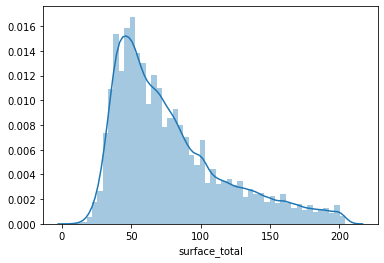

In [9]:
sns.distplot(datafiltrado["surface_total"])

In [10]:
datafiltrado.shape

(85195, 7)

##### a Continuacion se elimina los outliers de atributos restantes y asi disminuir la varianza Y obtener una mejor distribucion. a pesar de que inicialmente tienen poca varianza se decide aplicarles de igual manera los outliers para mejorar el desempeño de los modelos

In [11]:
datafiltrado=remove_outliers(datafiltrado,"bedrooms")

In [12]:
datafiltrado.shape

(82039, 7)

In [13]:
datafiltrado=remove_outliers(datafiltrado,"bathrooms")

In [14]:
datafiltrado=remove_outliers(datafiltrado,"rooms")

In [15]:
datafiltrado.describe()

,rooms,bedrooms,bathrooms,surface_total,price
count,79457.000000,79457.000000,77479.000000,71295.000000,7.945700e+04
mean,2.632971,1.705312,1.365609,73.172887,1.986746e+05
std,0.920081,0.799505,0.588273,35.416725,1.406790e+05
min,1.000000,0.000000,1.000000,10.000000,7.500000e+03
25%,2.000000,1.000000,1.000000,47.000000,1.150000e+05
50%,3.000000,2.000000,1.000000,65.000000,1.600000e+05
75%,3.000000,2.000000,2.000000,90.000000,2.380000e+05
max,4.000000,3.000000,3.000000,204.000000,4.144561e+06


In [16]:
datafiltrado.shape

(79457, 7)

##### Se observa finalmente la reduccion de la varianza de todos los atributos, lo que significa que la funcion se aplicon exito.

### Imputacion de valores faltantes

In [17]:
display(datafiltrado.isna().sum().to_frame())
datafiltrado["bathrooms"].mean()

,0
rooms,0
bedrooms,0
bathrooms,1978
surface_total,8162
price,0
property_type,0
l3,0


1.3656087455955808

In [18]:
datafiltrado2 = datafiltrado.copy()
datafiltrado2.fillna(datafiltrado2.mean(),inplace = True)
datafiltrado2.isna().sum()


rooms            0
bedrooms         0
bathrooms        0
surface_total    0
price            0
property_type    0
l3               0
dtype: int64

In [19]:
display(datafiltrado2.isna().sum().to_frame())

,0
rooms,0
bedrooms,0
bathrooms,0
surface_total,0
price,0
property_type,0
l3,0


#### Se realizo la imputacion de valores faltantes utilizando el promedio de los atributos, se selecciono esta opcion de imputacion ya que la media es un valor confiable.

### A continuacion se procede a  incorporar de las variables categoricas a los modelos

In [20]:
dummy_ubicacion = pd.get_dummies(datafiltrado2["property_type"], prefix="tipo")
datafiltrado3=pd.concat([datafiltrado2,dummy_ubicacion],axis=1)
datafiltrado3

,rooms,bedrooms,bathrooms,surface_total,price,property_type,l3,tipo_Casa,tipo_Departamento,tipo_PH
11,2.0,1.0,1.0,68.0,149000.0,Departamento,Boedo,0,1,0
12,2.0,1.0,1.0,50.0,115000.0,Departamento,Boedo,0,1,0
20,2.0,1.0,1.0,31.0,75000.0,Departamento,Abasto,0,1,0
21,1.0,1.0,1.0,22.0,48000.0,Departamento,Abasto,0,1,0
22,2.0,1.0,1.0,45.0,95000.0,Departamento,Flores,0,1,0
...,...,...,...,...,...,...,...,...,...,...
146440,2.0,1.0,1.0,40.0,130000.0,PH,Palermo,0,0,1
146441,2.0,1.0,1.0,40.0,130000.0,PH,Palermo,0,0,1
146549,3.0,2.0,1.0,84.0,178000.0,PH,Palermo,0,0,1
146554,4.0,3.0,3.0,175.0,570000.0,PH,Palermo,0,0,1


In [21]:
from sklearn.preprocessing import LabelEncoder
data_filtrado=datafiltrado3.filter(["l3"])
data_filtrado=data_filtrado.apply(LabelEncoder().fit_transform)
data_filtrado

,l3
11,8
12,8
20,0
21,0
22,17
...,...
146440,26
146441,26
146549,26
146554,26


In [22]:
datafiltrado3=datafiltrado3.drop(["l3"],axis=1)

In [23]:
datafiltrado3

,rooms,bedrooms,bathrooms,surface_total,price,property_type,tipo_Casa,tipo_Departamento,tipo_PH
11,2.0,1.0,1.0,68.0,149000.0,Departamento,0,1,0
12,2.0,1.0,1.0,50.0,115000.0,Departamento,0,1,0
20,2.0,1.0,1.0,31.0,75000.0,Departamento,0,1,0
21,1.0,1.0,1.0,22.0,48000.0,Departamento,0,1,0
22,2.0,1.0,1.0,45.0,95000.0,Departamento,0,1,0
...,...,...,...,...,...,...,...,...,...
146440,2.0,1.0,1.0,40.0,130000.0,PH,0,0,1
146441,2.0,1.0,1.0,40.0,130000.0,PH,0,0,1
146549,3.0,2.0,1.0,84.0,178000.0,PH,0,0,1
146554,4.0,3.0,3.0,175.0,570000.0,PH,0,0,1


In [24]:
data_filtrado=pd.concat([datafiltrado3,data_filtrado], axis=1)
data_filtrado

,rooms,bedrooms,bathrooms,surface_total,price,property_type,tipo_Casa,tipo_Departamento,tipo_PH,l3
11,2.0,1.0,1.0,68.0,149000.0,Departamento,0,1,0,8
12,2.0,1.0,1.0,50.0,115000.0,Departamento,0,1,0,8
20,2.0,1.0,1.0,31.0,75000.0,Departamento,0,1,0,0
21,1.0,1.0,1.0,22.0,48000.0,Departamento,0,1,0,0
22,2.0,1.0,1.0,45.0,95000.0,Departamento,0,1,0,17
...,...,...,...,...,...,...,...,...,...,...
146440,2.0,1.0,1.0,40.0,130000.0,PH,0,0,1,26
146441,2.0,1.0,1.0,40.0,130000.0,PH,0,0,1,26
146549,3.0,2.0,1.0,84.0,178000.0,PH,0,0,1,26
146554,4.0,3.0,3.0,175.0,570000.0,PH,0,0,1,26


In [25]:
data_filtrado.corr()

,rooms,bedrooms,bathrooms,surface_total,price,tipo_Casa,tipo_Departamento,tipo_PH,l3
rooms,1.000000,0.941051,0.498354,0.658358,0.473933,0.107493,-0.182742,0.153243,-0.059028
bedrooms,0.941051,1.000000,0.503718,0.640142,0.468324,0.108700,-0.172235,0.141747,-0.059134
bathrooms,0.498354,0.503718,1.000000,0.568637,0.588807,0.051864,-0.002625,-0.016094,-0.048521
surface_total,0.658358,0.640142,0.568637,1.000000,0.648603,0.149703,-0.234422,0.192287,-0.004133
price,0.473933,0.468324,0.588807,0.648603,1.000000,0.045787,0.014394,-0.031796,-0.009011
tipo_Casa,0.107493,0.108700,0.051864,0.149703,0.045787,1.000000,-0.313376,-0.033771,0.037325
tipo_Departamento,-0.182742,-0.172235,-0.002625,-0.234422,0.014394,-0.313376,1.000000,-0.938505,-0.093553
tipo_PH,0.153243,0.141747,-0.016094,0.192287,-0.031796,-0.033771,-0.938505,1.000000,0.084888
l3,-0.059028,-0.059134,-0.048521,-0.004133,-0.009011,0.037325,-0.093553,0.084888,1.000000


### 2. Incorporacion de modelos avanzados

En esta sección, se eligieron los siguentes modelos avanzados :

* Regresion polinomica con regularizacion
* Xgboosting
* arbol de decision optimizado con gridsearch

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split



In [27]:
predictors = data_filtrado[["rooms","surface_total","bathrooms","l3","tipo_Casa","tipo_Departamento","tipo_PH"]]
target = data_filtrado["price"]
X = predictors
x=X
y = target
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(
    X, y, test_size=0.30, random_state=42)


print(X_train_1.shape, y_train_1.shape, X_test_1.shape, y_test_1.shape)

(55619, 7) (55619,) (23838, 7) (23838,)


# modelo lineal

In [28]:
linear_model = LinearRegression()

#### Entrenamiento

In [29]:
linear_model.fit(X_train_1, y_train_1)
print(linear_model.coef_, linear_model.intercept_)

[  4468.44999166   2071.130098    72124.07952094    173.58451479
 -26705.22244463  45107.98104141 -18402.75859678] -105639.79569410125


#### Predicciones

In [30]:
y_train_pred_1 = linear_model.predict(X_train_1)
y_test_pred_1 = linear_model.predict(X_test_1)
print(y_train_pred_1)
print(y_test_pred_1)

[164814.84240201 133794.51850024 106487.00595824 ... 464725.78410537
 119134.90737894 268887.56022168]
[107378.69669115  97531.91566605 361522.91369437 ... 175355.05273656
 129269.43703623 102865.49930662]


### evaluacion de desempeño

In [31]:
from sklearn.metrics import mean_squared_error
import sklearn.metrics as metrics
from sklearn.metrics import r2_score
mse_test = mean_squared_error(y_test_1, y_test_pred_1)
mse_train=mean_squared_error(y_train_1, y_train_pred_1)
r2_score_linear_regression=metrics.r2_score(y_test_1, y_test_pred_1)
rmse = np.sqrt(mse_test)
rmse_train_modelo_lineal=np.sqrt(mse_train)
rmse_test_modelo_lineal=rmse
print("rmse test modelo lineal:",rmse_test_modelo_lineal)
print("rmse train  modelo lineal:",rmse_train_modelo_lineal)
print("r2 modelo lineal:",r2_score_linear_regression)

rmse test modelo lineal: 99152.66248344361
rmse train  modelo lineal: 98221.56156662203
r2 modelo lineal: 0.5009886037639355


### distribucion de error

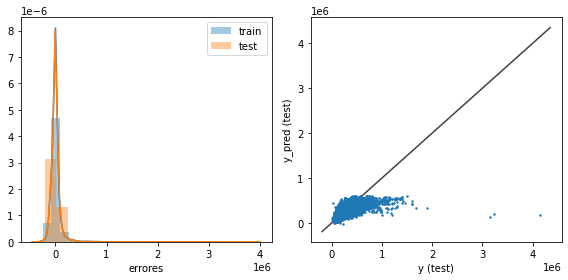

In [32]:


plt.figure(figsize = (8,4))

plt.subplot(1,2,1)
sns.distplot(y_train_1 - y_train_pred_1, bins = 20, label = 'train')
sns.distplot(y_test_1 - y_test_pred_1, bins = 20, label = 'test')
plt.xlabel('errores')
plt.legend()


ax = plt.subplot(1,2,2)
ax.scatter(y_test_1,y_test_pred_1, s =2)

lims = [
np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
]

ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
plt.xlabel('y (test)')
plt.ylabel('y_pred (test)')

plt.tight_layout()
plt.show()

## modelo polinomico

In [33]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [34]:

x =X
y_real = target
from sklearn.model_selection import train_test_split
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(
    X, y, test_size=0.25, random_state=42)

In [35]:
poly =PolynomialFeatures(4)
X_train_new =poly.fit_transform(X_train_2)
X_test_new =poly.fit_transform(X_test_2)
X_test_new.shape
X_train_new.shape

(59592, 330)

In [36]:
reg_2 = LinearRegression()
reg_2.fit(X_train_new, y_train_2)
print(reg_2.coef_, reg_2.intercept_)
y_train_pred_2 = reg_2.predict(X_train_new)
y_test_pred_2 = reg_2.predict(X_test_new)

[-3.26985211e-04 -1.39500400e+05  8.54969113e+03 -2.56340994e+05
 -5.03636839e+03 -3.68614691e+04  6.18236113e+03  3.06791084e+04
 -1.83116359e+05 -5.82942441e+01  5.93133466e+05  6.41197688e+03
 -2.38426563e+05  3.39563898e+04  6.49698606e+04 -7.21541737e+01
 -6.84687186e+03 -1.94830144e+02  5.71051202e+03  4.92594865e+02
  2.34658923e+03 -1.49705591e+05 -2.15256664e+03  1.58768934e+05
 -1.23409454e+05 -2.91700487e+05  4.72677936e+02 -1.26213481e+03
 -2.18133655e+03 -1.59289250e+03 -3.68614668e+04  1.64487821e-05
 -1.69720070e-06  6.18235891e+03 -4.29825049e-06  3.06791079e+04
  5.58719909e+04  7.05025492e+02  8.55706561e+04 -1.80231210e+03
  4.20318521e+04 -1.14994278e+05 -1.10153934e+05 -3.11917428e+01
  1.28461837e+03  7.16035470e+01 -1.52699253e+03  8.03894241e+02
  6.64805402e+02 -5.58214401e+05 -2.38076437e+03  2.87201413e+05
  2.10700106e+05  9.52319454e+04 -2.00286335e+02  2.09254207e+03
  1.65070362e+03  2.66873173e+03 -2.38426562e+05  9.08630398e-08
  2.03569897e-07  3.39563

Raíz del error cuadrático medio en Train: 89510.19763258121
Raíz del error cuadrático medio en Test: 90495.40450571102


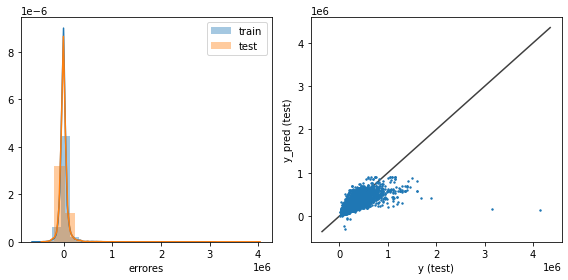

In [37]:
rmse_train_polinomico = np.sqrt(mean_squared_error(y_train_2, y_train_pred_2))
rmse_test_polinomico = np.sqrt(mean_squared_error(y_test_2, y_test_pred_2))
print(f'Raíz del error cuadrático medio en Train: {rmse_train_polinomico}')
print(f'Raíz del error cuadrático medio en Test: {rmse_test_polinomico}')

plt.figure(figsize = (8,4))

plt.subplot(1,2,1)
sns.distplot(y_train_2 - y_train_pred_2, bins = 20, label = 'train')
sns.distplot(y_test_2 - y_test_pred_2, bins = 20, label = 'test')
plt.xlabel('errores')
plt.legend()


ax = plt.subplot(1,2,2)
ax.scatter(y_test_2,y_test_pred_2, s =2)

lims = [
np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
]

ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
plt.xlabel('y (test)')
plt.ylabel('y_pred (test)')

plt.tight_layout()
plt.show()

In [38]:
from sklearn.linear_model import Ridge, Lasso

reg_ridge = Ridge(alpha= 9)
reg_ridge.fit(X_train_new,y_train_2)
y_train_pred_2 = reg_ridge.predict(X_train_new)
y_test_pred_2 = reg_ridge.predict(X_test_new)

print(f'Pendientes: {reg_ridge.coef_}')
print(f'Ordenada: {reg_ridge.intercept_}')

Pendientes: [ 0.00000000e+00 -2.08295205e+04  5.79855175e+03 -1.32880958e+04
 -4.03727493e+03 -1.38361282e+04  2.29593852e+04 -9.12325704e+03
 -3.04330288e+04  2.63279106e+02  2.74367539e+04  6.53977009e+03
 -1.66747087e+04 -6.43964713e+02 -3.51084711e+03 -7.12701536e+01
 -2.43076938e+03 -1.76628454e+02  3.63719391e+03  1.19980580e+02
  2.04137794e+03  7.44892512e+03 -5.94474594e+03 -6.96155074e+02
 -1.75238723e+04  4.93193156e+03  4.60951851e+02 -1.85268728e+03
 -1.12272368e+03 -1.06186390e+03 -1.38361282e+04  0.00000000e+00
  0.00000000e+00  2.29593852e+04  0.00000000e+00 -9.12325704e+03
 -2.23287614e+03  7.04463958e+02  4.66701016e+04 -1.83752071e+03
  2.11867551e+03 -2.24939090e+04 -1.00577952e+04 -3.35923641e+01
  1.38249664e+03  6.76449763e+01 -8.91793766e+02  7.02951120e+02
  4.52120535e+02 -1.22862216e+05 -1.94665989e+03  4.18555469e+03
  4.47582636e+04 -2.15070643e+04 -1.92181695e+02  3.05778567e+03
  1.13886230e+03  2.34312218e+03 -1.66747087e+04  0.00000000e+00
  0.00000000e

C:\Users\ACER\Anaconda3\envs\ACAMICA\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.44284e-21): result may not be accurate.
  overwrite_a=True).T


Raíz del error cuadrático medio en Train: 89651.5035043116
Raíz del error cuadrático medio en Test: 90582.11273986746


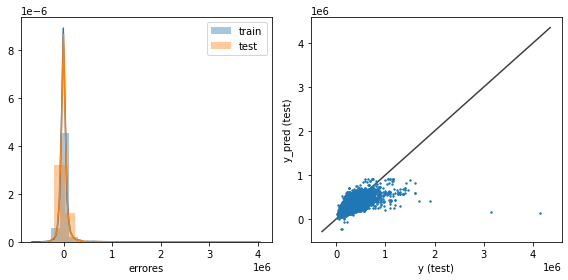

In [39]:
rmse_train_regularizado = np.sqrt(mean_squared_error(y_train_2, y_train_pred_2))
rmse_test_regularizado = np.sqrt(mean_squared_error(y_test_2, y_test_pred_2))
print(f'Raíz del error cuadrático medio en Train: {rmse_train_regularizado}')
print(f'Raíz del error cuadrático medio en Test: {rmse_test_regularizado}')

plt.figure(figsize = (8,4))

plt.subplot(1,2,1)
sns.distplot(y_train_2 - y_train_pred_2, bins = 20, label = 'train')
sns.distplot(y_test_2 - y_test_pred_2, bins = 20, label = 'test')
plt.xlabel('errores')
plt.legend()


ax = plt.subplot(1,2,2)
ax.scatter(y_test_2,y_test_pred_2, s =2)

lims = [
np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
]

ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
plt.xlabel('y (test)')
plt.ylabel('y_pred (test)')

plt.tight_layout()
plt.show()

#### Analisis de la regresion polinomica: se observa como disminuye el error, esto se debe a que transformar los atributos en relaciones polinomicas se mejora la prediccion. en cuanto a la regularizacion el modelo permanece con un RMSE semejante debido a que el grando del polinomio elegido no existe riesgo de sobre ajuste

### XGBOOST

In [40]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, ensemble
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier

import sklearn.metrics as metrics

from sklearn.model_selection import learning_curve
import xgboost as xgb

In [41]:
x =X
y_real = target
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42)

In [42]:

xgb_cl = xgb.XGBRegressor(n_estimators=250, max_depth=2)
xgb_cl.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)],
        eval_metric=['rmse'])

[0]	validation_0-rmse:187369.45312	validation_1-rmse:186296.37500
[1]	validation_0-rmse:151245.96875	validation_1-rmse:150198.51562
[2]	validation_0-rmse:128319.57812	validation_1-rmse:127260.73438
[3]	validation_0-rmse:115140.67969	validation_1-rmse:114195.96094
[4]	validation_0-rmse:107486.97656	validation_1-rmse:106634.34375
[5]	validation_0-rmse:103336.37500	validation_1-rmse:102580.49219
[6]	validation_0-rmse:100511.78125	validation_1-rmse:99859.10156
[7]	validation_0-rmse:98135.54688	validation_1-rmse:97633.02344
[8]	validation_0-rmse:95827.16406	validation_1-rmse:95543.17188
[9]	validation_0-rmse:94387.17969	validation_1-rmse:94174.64062
[10]	validation_0-rmse:93563.82031	validation_1-rmse:93325.07812
[11]	validation_0-rmse:92416.57812	validation_1-rmse:92281.43750
[12]	validation_0-rmse:91928.12500	validation_1-rmse:91838.50000
[13]	validation_0-rmse:91456.02344	validation_1-rmse:91411.03906
[14]	validation_0-rmse:90464.96094	validation_1-rmse:90532.38281
[15]	validation_0-rmse

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=2,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=250, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [43]:
y_pred_test_3 = xgb_cl.predict(X_test)
y_pred_train_3 = xgb_cl.predict(X_train)

In [44]:
#rmse
xgb_rmse_test=mean_squared_error(y_test,y_pred_test_3)
xgb_rmse_train=mean_squared_error(y_train,y_pred_train_3)
xgb_rmse_test=np.sqrt(xgb_rmse_test)
xgb_rmse_train=np.sqrt(xgb_rmse_train)
xgb_rmse_test
xgb_rmse_train

73342.10537954315

In [45]:
error_test = metrics.mean_squared_error(y_test, y_pred_test_3)
error_train = metrics.mean_squared_error(y_train, y_pred_train_3)
error_test=np.sqrt(error_test)
error_train=np.sqrt(error_train)
r2_score_test=metrics.r2_score(y_test, y_pred_test_3)
r2_score_train=metrics.r2_score(y_train, y_pred_train_3)

In [46]:
print('error sobre el train set: ', error_train)
print('error sobre el test set: ', error_test)
print('r2_score train: ',r2_score_train )
print('r2_score test:: ', r2_score_test )
# esto quiere decir que no hay sobre ajuste es decir tiene como

error sobre el train set:  73342.10537954315
error sobre el test set:  75421.4776317615
r2_score train:  0.7292791545355968
r2_score test::  0.7090781536788693


In [47]:
evals_results = xgb_cl.evals_result()
print(evals_results)

{'validation_0': OrderedDict([('rmse', [187369.453125, 151245.96875, 128319.578125, 115140.679688, 107486.976563, 103336.375, 100511.78125, 98135.546875, 95827.164063, 94387.179688, 93563.820313, 92416.578125, 91928.125, 91456.023438, 90464.960938, 90250.1875, 89709.492188, 89397.914063, 86234.601563, 85980.015625, 85723.445313, 85539.171875, 85373.921875, 85221.546875, 85127.804688, 84939.84375, 83599.75, 83173.414063, 83124.765625, 83046.875, 82944.375, 82735.5, 81968.453125, 81662.320313, 81611.828125, 81389.90625, 81358.875, 81247.414063, 81155.859375, 81014.304688, 80615.25, 80550.945313, 80489.8125, 80316.53125, 80226.523438, 80102.375, 80003.140625, 79615.835938, 79473.390625, 79411.296875, 79298.773438, 79221.296875, 79187.914063, 78992.335938, 78917.390625, 78867.476563, 78658.1875, 78633.992188, 78556.484375, 78483.476563, 78471.210938, 78360.265625, 78316.945313, 78254.90625, 78082.140625, 78029.234375, 77947.421875, 77878.445313, 77812.328125, 77743.570313, 77630.960938, 77

Text(0.5, 0, 'Número de árboles')

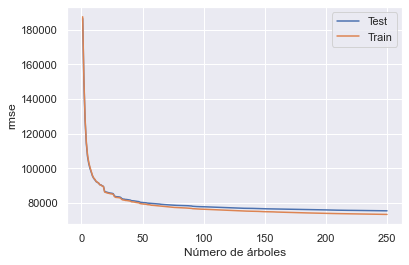

In [48]:
error_test = []
error_train = []
# Calculamos el accuracy sobre el test set
for prediccion_test in evals_results['validation_1']['rmse']:
    error_test.append(prediccion_test)
    
for prediccion_train in evals_results['validation_0']['rmse']:    
    error_train.append(prediccion_train)
    
plt.plot(range(1, len(error_test) + 1), error_test, label = 'Test')
plt.plot(range(1, len(error_test) + 1), error_train, label = 'Train')
plt.legend()
plt.ylabel('rmse')
plt.xlabel('Número de árboles')

### en este grafico se analiza que la cantidad de arboles oprima es aproxidamente 50 arboles,ya que luego no disminuye significativamente el RMSE. y en cuanto al sobre ajuste no hay peligro ya que siempre son similares train y test.

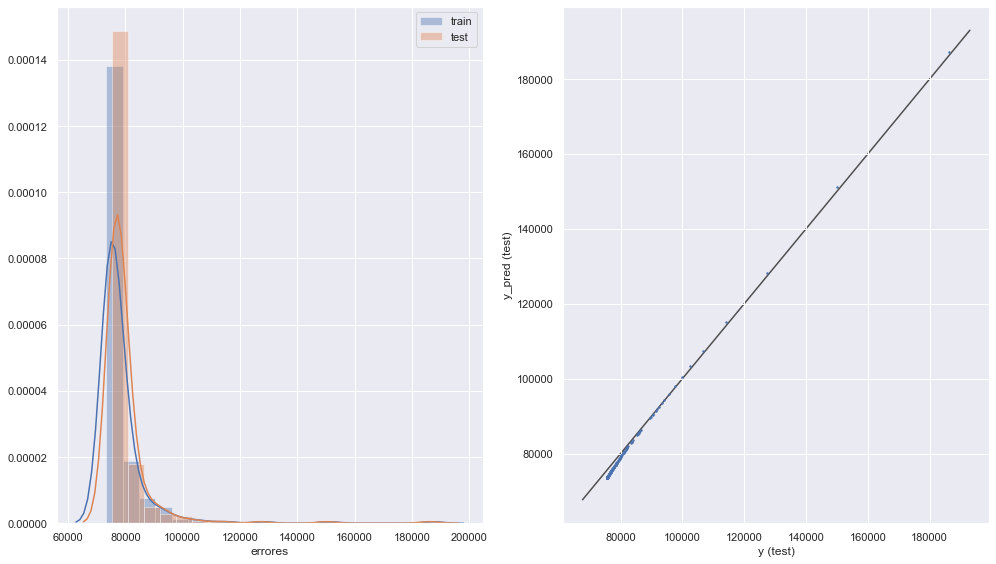

In [49]:
error_test = []
error_train = []
# Calculamos el rmse sobre el test set
for prediccion_test in evals_results['validation_1']['rmse']:
    error_test.append(prediccion_test)
    
for prediccion_train in evals_results['validation_0']['rmse']:    
    error_train.append(prediccion_train)
    
plt.figure(figsize = (14,8))

plt.subplot(1,2,1)
sns.distplot(error_train, bins = 20, label = 'train')
sns.distplot(error_test, bins = 20, label = 'test')
plt.xlabel('errores')
plt.legend()


ax = plt.subplot(1,2,2)
ax.scatter(error_test,error_train, s =2)

lims = [
np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
]

ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
plt.xlabel('y (test)')
plt.ylabel('y_pred (test)')

plt.tight_layout()
plt.show()

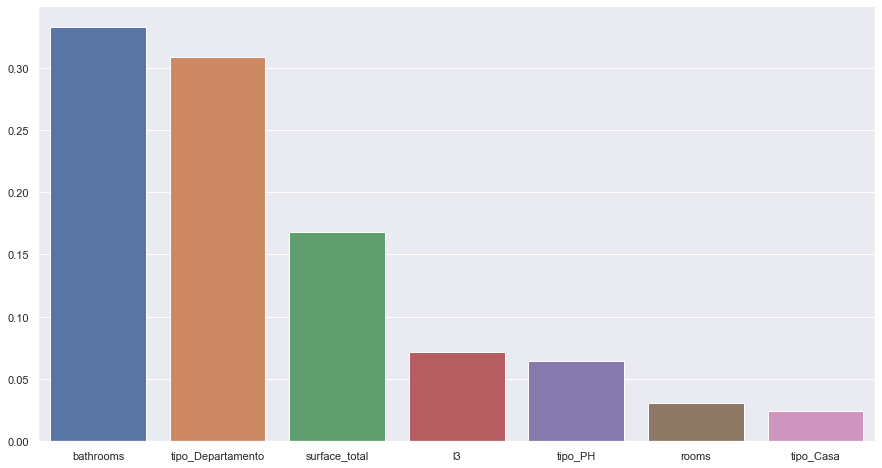

In [50]:
importances=xgb_cl.feature_importances_
columns=X_train.columns
indices=np.argsort(importances)[::-1]
plt.figure(figsize=(15,8))
sns.barplot(columns[indices],importances[indices])

#### Analisis Xrgboost: Este modelo a diferencia de los tradicionles utiliza el ensamble de multiples arboles de decision y su desempeño mejora a medida que se agregan mas arboles, reduciendo el RMSE. el optimo de arboles se observa a los 50 arboles donde se encuentra en un minimo el RMSE. Este modelo obtuvo el mejor desempeño. Por otro lado tampoco se observa sobre ajuste debido a que se grafico la disbtribucion de error. Por ultimo es oportuno destacar su parametro r2 ( coeficiente de regresion), el cual es el mayor debido a su mayor precision en los valores predichos.

### Comparativa arboles vs regresor lineal y polinomico: otra conlusion obtenida es que el arbol de decision le da una mayor importancia a las variables categoricas. por lo cual explica los mejores resultados del modelo xrgboost . esta conclusion se sostiene en la gran importancia que tiene la variable predictora tipo_departamento. esto tambien explica la mayor correlacion de los modelos tipo arbol vs la regresion lineal y polinomica. Esto significa finalmente que que el tipo de propiedad es muy importante a la hora de realizar el analisis y asi tambien la ubicacion del mismo.

Otra conclusion que se desprende es que a la hora de realizar predicciones es de suma importancia el analisis de distintos tipos de modelo debido a que la naturaleza de cada modelo es de suma importancia. En este caso los arboles tienen un mejor comportamineto que la regresion lineal y polinomica para este Dataset.

### Comparacion de distribucion de errores y error absoluto de los modelos

<Figure size 1008x576 with 0 Axes>

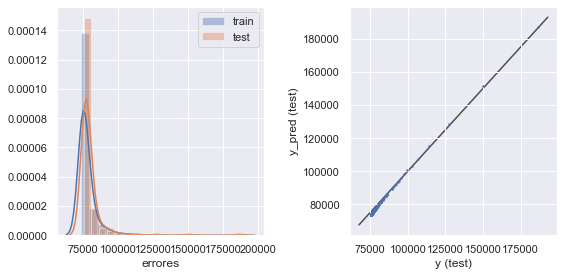

rmse 75421.4776317615
rmse 73342.10537954315
r2_score train:  0.7292791545355968
r2_score test::  0.7090781536788693


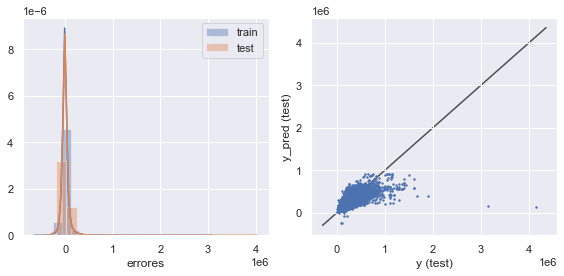

Raíz del error cuadrático medio en Train: 89651.5035043116
Raíz del error cuadrático medio en Test: 90582.11273986746


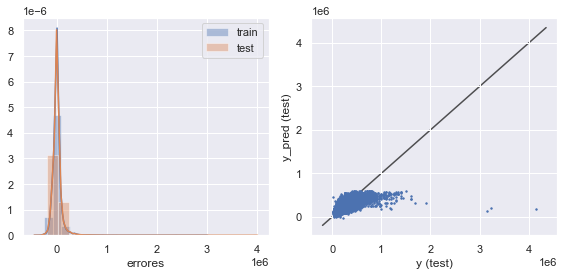

rmse test modelo lineal: 99152.66248344361
rmse train  modelo lineal: 98221.56156662203
r2 modelo lineal: 0.5009886037639355


In [51]:

import seaborn as sns
modelos = ['Regresión lineal=linear_model', 'Regresion polinomica=reg_2', 'xgb_cl']
plt.figure(figsize = (14,8))

error_test = []
error_train = []
# Calculamos el rmse sobre el test set
for prediccion_test in evals_results['validation_1']['rmse']:
    error_test.append(prediccion_test)
    
for prediccion_train in evals_results['validation_0']['rmse']:    
    error_train.append(prediccion_train)
    
plt.figure(figsize = (8,4))

plt.subplot(1,2,1)
sns.distplot(error_train, bins = 20, label = 'train')
sns.distplot(error_test, bins = 20, label = 'test')
plt.xlabel('errores')
plt.legend()


ax = plt.subplot(1,2,2)
ax.scatter(error_test,error_train, s =2)

lims = [
np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
]

ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
plt.xlabel('y (test)')
plt.ylabel('y_pred (test)')

plt.tight_layout()
plt.show()
print("rmse",xgb_rmse_test )
print("rmse",xgb_rmse_train )
print('r2_score train: ',r2_score_train )
print('r2_score test:: ', r2_score_test )
## modelo polinomico

rmse_train_polinomico = np.sqrt(mean_squared_error(y_train, y_train_pred_2))
rmse_test_polinomico = np.sqrt(mean_squared_error(y_test, y_test_pred_2))

plt.figure(figsize = (8,4))

plt.subplot(1,2,1)
sns.distplot(y_train - y_train_pred_2, bins = 20, label = 'train')
sns.distplot(y_test - y_test_pred_2, bins = 20, label = 'test')
plt.xlabel('errores')
plt.legend()


ax = plt.subplot(1,2,2)
ax.scatter(y_test,y_test_pred_2, s =2)

lims = [
np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
]

ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
plt.xlabel('y (test)')
plt.ylabel('y_pred (test)')

plt.tight_layout()
plt.show()
print(f'Raíz del error cuadrático medio en Train: {rmse_train_polinomico}')
print(f'Raíz del error cuadrático medio en Test: {rmse_test_polinomico}')
## modelo lineal 

plt.figure(figsize = (8,4))

plt.subplot(1,2,1)
sns.distplot(y_train_1 - y_train_pred_1, bins = 20, label = 'train')
sns.distplot(y_test_1 - y_test_pred_1, bins = 20, label = 'test')
plt.xlabel('errores')
plt.legend()


ax = plt.subplot(1,2,2)
ax.scatter(y_test_1,y_test_pred_1, s =2)

lims = [
np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
]

ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
plt.xlabel('y (test)')
plt.ylabel('y_pred (test)')
plt.tight_layout()
plt.show()
print("rmse test modelo lineal:",rmse_test_modelo_lineal)
print("rmse train  modelo lineal:",rmse_train_modelo_lineal)
print("r2 modelo lineal:",r2_score_linear_regression)

### Conclusion sobre la DISTRIBUCION DE LOS ERORRES
##### -en ninguno de los tres modelos elegidos se observa sobreajuste debido a la poca diferencia y distribucion de los errores entre rmse train y test. lo cual significa que la varianza en los 3 modelos es baja, lo que define el mejor modelo es el sesgo que el boosting fue el que obtuvo el mejor sesgo. 

### Arbol de decision utilizado en proyecto 1, para luego comparar como varia el desempeño debido al preprocesamiento de los datos

In [81]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

In [82]:
predictors = data_filtrado[["rooms","surface_total","bathrooms"]]
target = data_filtrado["price"]
X = predictors
y = target

### Para poder analizar la importancia del pre-procesamiento de datos se utilizaron las mismas variables predictoras, la unica pequeña diferencia es en la variable surface_total ya que en el proyecto 1 se utilizo surface_covered pero se considera que no alterara el resultado del analisis debido a la alta correlacion entre dichas variables

In [83]:
#division de muestra en train y test
from sklearn.model_selection import train_test_split
#X=X.values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42)


print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(55619, 3) (55619,) (23838, 3) (23838,)


In [84]:
#entrenamiento de arbol
regtree = DecisionTreeRegressor(max_depth=10, random_state=42)
regtree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=10, random_state=42)

### se decide utilizar una profunidad de 10 para conservar los mismos hiperparametros que el modelo del proyecto 1 a pesar que el grado optimo es de 9 ya que es el resultado de la optimizacion del grid search.

In [85]:
#prediccion del arbol
y_train_pred_arbol = regtree.predict(X_train)
y_test_pred_arbol = regtree.predict(X_test)

In [86]:
mse_test = mean_squared_error(y_test, y_test_pred_arbol)
mse_train = mean_squared_error(y_train, y_train_pred_arbol)
rmse_arbol_train = np.sqrt(mse_train)
rmse_arbol_test = np.sqrt(mse_test)
print("rmse test",rmse_arbol_test)
print("rmse train",rmse_arbol_train)

rmse test 92265.90879212214
rmse train 87072.33828893879


In [87]:
# Definimos las listas vacias para los valores de accuracy deseados
lista_accuracy_train = []
lista_accuracy_test = []

# Definimos la lista de valores de k que vamos a explorar
depth = [1,2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,50]

# Generamos en loop sobre los distintos valores de k 
for d in depth:
    
    # Vamos a repetir el siguiente bloque de código
    
    # Definir el modelo con el valor de vecinos deseado
    regtree =tree.DecisionTreeRegressor(max_depth=d, random_state=0)
    
    # Entrenar el modelo
    regtree.fit(X_train,y_train)
    
    # Predecir y evaluar sobre el set de entrenamiento
    y_train_pred_arbol = regtree.predict(X_train)
    mse = mean_squared_error( y_train, y_train_pred_arbol )
    test_rmse = np.sqrt(mse)
    
    # Predecir y evaluar sobre el set de evaluación
    y_test_pred_arbol = regtree.predict(X_test)
    mse = mean_squared_error(y_test, y_test_pred_arbol)
    train_rmse = np.sqrt(mse)
    
    # Agregar la información a las listas
    lista_accuracy_train.append(train_rmse)
    lista_accuracy_test.append(test_rmse)

Text(0.5, 1.0, 'RMSE / Grados de profundidad')

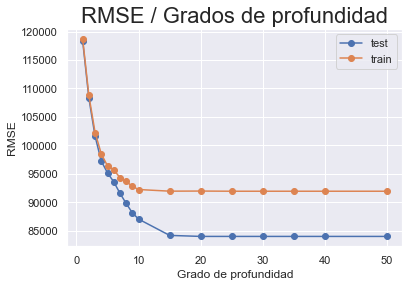

In [88]:
plt.plot(depth,lista_accuracy_test,'o-',label='test')
plt.plot(depth,lista_accuracy_train,'o-',label='train' )
plt.legend()
plt.xlabel('Grado de profundidad')
plt.ylabel('RMSE')
plt.title('RMSE / Grados de profundidad', size=22)

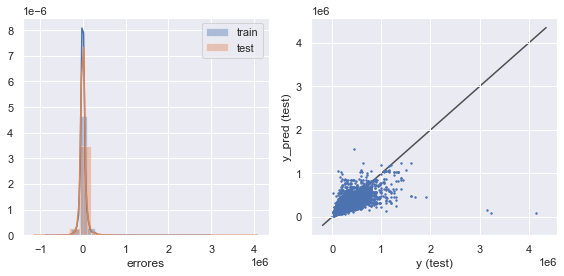

In [89]:
rmse_train_arbol = np.sqrt(mean_squared_error(y_train, y_train_pred_arbol))
rmse_test_arbol = np.sqrt(mean_squared_error(y_test, y_test_pred_arbol))

plt.figure(figsize = (8,4))

plt.subplot(1,2,1)
sns.distplot(y_train - y_train_pred_arbol, bins = 20, label = 'train')
sns.distplot(y_test - y_test_pred_arbol, bins = 20, label = 'test')
plt.xlabel('errores')
plt.legend()


ax = plt.subplot(1,2,2)
ax.scatter(y_test,y_test_pred_arbol, s =2)

lims = [
np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
]

ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
plt.xlabel('y (test)')
plt.ylabel('y_pred (test)')

plt.tight_layout()
plt.show()



In [90]:

param_grid = {'max_depth':np.arange(1,10),}

In [91]:

model2 = GridSearchCV(regtree, param_grid=param_grid, cv=5)
model2.fit(X_train_arbol, y_train_arbol)
print("Mejores parametros: "+str(model2.best_params_))
print("Mejor Score: "+str(model2.best_score_)+'\n')
scores = pd.DataFrame(model2.cv_results_)
scores


Mejores parametros: {'max_depth': 9}
Mejor Score: 0.5763138435815675



,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.015336,0.004091,0.004802,0.003921,1,{'max_depth': 1},0.285776,0.304838,0.289496,0.296340,0.280109,0.291312,0.008575,9
1,0.020794,0.006401,0.003203,0.003923,2,{'max_depth': 2},0.409935,0.432243,0.399152,0.402397,0.385338,0.405813,0.015433,8
2,0.022614,0.006067,0.006400,0.003200,3,{'max_depth': 3},0.478201,0.504647,0.472115,0.475903,0.450030,0.476179,0.017406,7
3,0.023997,0.005065,0.003200,0.003919,4,{'max_depth': 4},0.509714,0.543030,0.522923,0.523522,0.481760,0.516190,0.020233,6
4,0.023934,0.005171,0.003125,0.006250,5,{'max_depth': 5},0.521014,0.562774,0.543537,0.541571,0.505636,0.534907,0.019724,5
5,0.022355,0.008278,0.003125,0.006250,6,{'max_depth': 6},0.522333,0.573538,0.552157,0.555059,0.522079,0.545033,0.020030,4
6,0.021440,0.006755,0.006245,0.007649,7,{'max_depth': 7},0.524858,0.586358,0.556173,0.576778,0.536481,0.556130,0.023255,3
7,0.037902,0.005614,0.003203,0.003923,8,{'max_depth': 8},0.530830,0.607436,0.563035,0.591031,0.546453,0.567757,0.028128,2
8,0.035958,0.006566,0.001600,0.003199,9,{'max_depth': 9},0.536750,0.616702,0.571783,0.602912,0.553422,0.576314,0.029828,1


### Analisis arbol de Regresion : debido al pre-procesamiento de las variables predictoras se observa un mejor desempeño del arbol, debido a que el Rmse_test Obtenido en el proyecto 1 fue de 155000 y en este proyecto se obtuvo un rmse_TEST de 92746. lo cual se produjo un descenso del 60% del error del modelo. concluyendo una clara mejora debido al pre-procesamiento de las variables predictoras. esto se debe a la cantidad de valores atipicos que tiene el dataset properati lo cual le intrudce un significante error al modelo y otra conclusion es que la imputacion de los valores faltantes utilizando el promedio es un metodo correcto para este dataset.

En cuanto al sobre ajuste, tambien se redujo lo cual tambien se debe al pre procesamiento de los datos.

Por otro lado se utilizo la optimizacion de del arbol mediante la tecnica de grid search.se decidio trabajar con el hiperparametro grado de profundidad debido a que lo considero de mayor importancia en este modelo. el grado de profundidad optimo es de 9. Este resultado es coherente debido a que si se observa el grafico grados de profundidad vs Rmse. Se observa que el grado de profunidad optimo es de 9 ya que es donde se miminiza el Rmse de test y  no hay riesdo de sobre ajuste debido a la poca distancia entre test y train, es decir menor sesgo y varianza.


### resumen de metricas de los modelos y conclusion

In [78]:
print("rmse",xgb_rmse_test )
print("rmse",xgb_rmse_train )
print(f'Raíz del error cuadrático medio en Train: {rmse_train_polinomico}')
print(f'Raíz del error cuadrático medio en Test: {rmse_test_polinomico}')
print("rmse test modelo lineal:",rmse_test_modelo_lineal)
print("rmse train  modelo lineal:",rmse_train_modelo_lineal)
print("rmse test",rmse_arbol_test)
print("rmse train",rmse_arbol_train)

rmse 75421.4776317615
rmse 73342.10537954315
Raíz del error cuadrático medio en Train: 89651.5035043116
Raíz del error cuadrático medio en Test: 90582.11273986746
rmse test modelo lineal: 99152.66248344361
rmse train  modelo lineal: 98221.56156662203
rmse test 92746.00844174591
rmse train 88483.0366272565


In [79]:
resultados = {'modelo':['Modelo Lineal', 'Modelo Polinomico', 'Xgboost', 'Arbol de Decision'], 'Rmse_Train':[rmse_train_modelo_lineal,rmse_train_polinomico,xgb_rmse_train,rmse_arbol_train], "Rmse_test":[rmse_test_modelo_lineal,rmse_test_polinomico,xgb_rmse_test,rmse_arbol_test]}
resultados=pd.DataFrame(resultados)
resultados

,modelo,Rmse_Train,Rmse_test
0,Modelo Lineal,98221.561567,99152.662483
1,Modelo Polinomico,89651.503504,90582.112740
2,Xgboost,73342.105380,75421.477632
3,Arbol de Decision,88483.036627,92746.008442


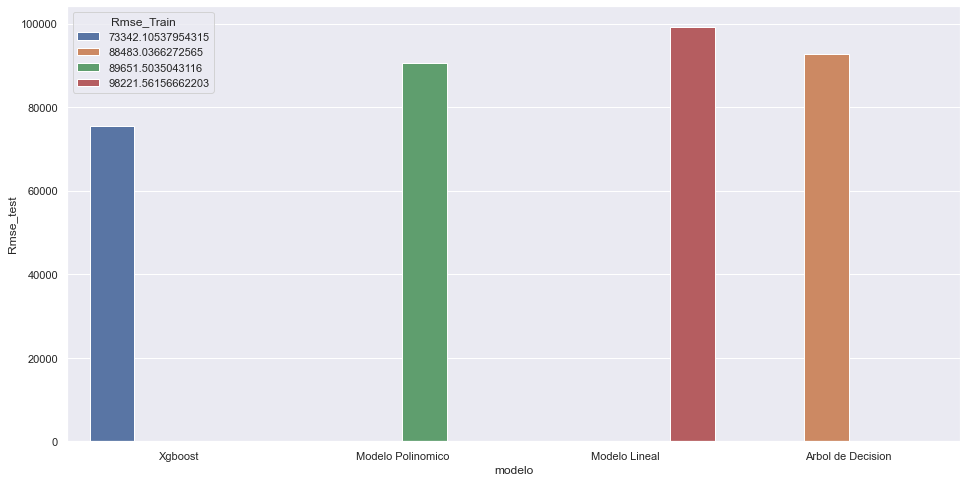

In [80]:
plt.figure(figsize = (16,8))
descending_order=resultados["modelo"].sort_values(ascending=False)
sns.barplot(x="modelo", y="Rmse_test",hue="Rmse_Train", data=resultados, order=descending_order)

### Conclusiones Finales

#### Sobre Pre-Procesamiento de Datos e incorporacion de nuevos atributos:

-El Preprosamiento de los datos Y incorporacion de variables categoricas, lo cual se compone de eliminacion de outliers, inclusion de variables categoricas(variable ubicacion y tipo de propiedad) e imputacion de valores faltantes, redujo notablemente los errores de los modelos. se puede comprobar comparando los modelos benchmark de los dos proyectos 1 y 2. En el proyecto 2 se redujo el Rmse del modelo benchmark(modelo lineal) en una relacion superior al 100%.
Las razones que justican la disminucion de los errores de los modelos, se debe claramente al pre-procesamiento de datos ya que eliminar outliers e imputacion de valores faltantes mejoran la correlacion de las variables predictoras. incorporar variables categoricas es otro factor importante que disminuyo el error ya que existe una relacion entre el precio de las propiedades, la ubicacion y el tipo de propiedad.

#### Sobre los modelos utilizados:

-Modelos avanzados: se observa el comportamiento esperado en los modelos ya que a medida que mas sofisticado es el modelo menor es el RMSE, obteniendo el mejor desempeño el modelo de boosting debido a que utiliza multiples arboles de decision.
En cuanto a la distribucion de errores se concluye que ningun modelo corre el riesgo de sobre ajuste debido a que tienen comportamientos similares la distribucion de train y test, lo cual quiere decir que la varianza de los modelos son bajos (con los hiperparametros elegidos).

Por otro lado se realizo la comparacion del desempeño del modelo 1 con el mismo modelo en el proyecto 2 pero realizando el preprocesamiento de los datos, se observa una mejora significativa de un 60% esto se debe a la importancia de eliminar outliers y imputar valores faltantes con criterio.

### COMPARACION ARBOLES DE REGRESION VS REGRESION LINEAL Y VARIABLES POLINOMICAS

-En el modelo de boosting se reflejo la importancia que la da el modelo a las variables, donde se destaca que le da mayor importancia al tipo de propiedad y la ubicacion de las propiedades. Lo cual tiene como consecuencia un mejor desempeño, lo cual explica el mejor coeficiente de regresion y menor RMSE. Esto se debe a que es un modelo mas sofisticado y se reflejo en la gran disminucion del RMSE y resulto ser el mejor modelo.


